# Practical 8: Linear Regression using SciPy

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Creating Sample Data

First, let's create some sample data to build our linear regression model.

First 5 data points:
x: 0.0000, y: 5.9934
x: 0.3448, y: 5.7580
x: 0.6897, y: 8.3643
x: 1.0345, y: 11.1495
x: 1.3793, y: 8.6696


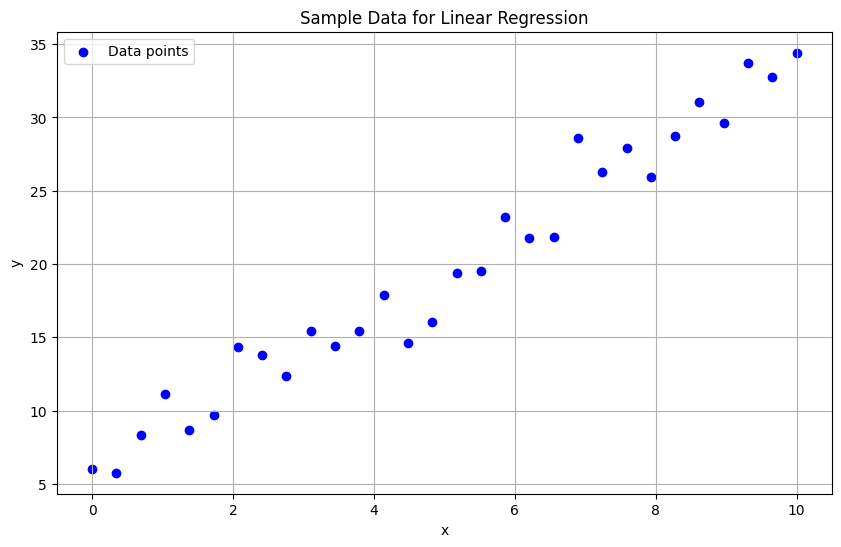

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate x values
x = np.linspace(0, 10, 30)

# Generate y values with some noise to simulate real-world data
y = 3*x + 5 + np.random.normal(0, 2, 30)

# Display the first few data points
print("First 5 data points:")
for i in range(5):
    print(f"x: {x[i]:.4f}, y: {y[i]:.4f}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.title('Sample Data for Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
# Build the linear regression model using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print the model parameters
print(f"Linear Regression Model: y = {slope:.4f}x + {intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"Coefficient of determination (r²): {r_value**2:.4f}")
print(f"p-value: {p_value:.8f}")
print(f"Standard error: {std_err:.4f}")

Linear Regression Model: y = 2.7962x + 5.6428
Correlation coefficient (r): 0.9807
Coefficient of determination (r²): 0.9619
p-value: 0.00000000
Standard error: 0.1052


## Creating a Prediction Function

Let's create a function to make predictions using our regression model.

In [4]:
# Define a function to predict y values using our model
def predict(x_values):
    return slope * x_values + intercept

# Generate predicted values for our existing x data
y_pred = predict(x)

# Calculate residuals (difference between actual and predicted values)
residuals = y - y_pred

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2.7620


## Visualizing the Regression Model

Now, let's visualize our data points and the regression line.

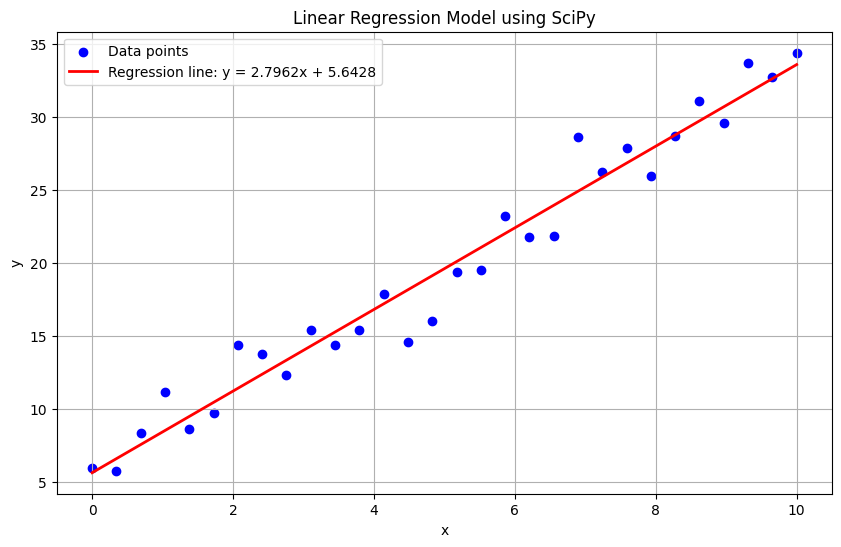

In [5]:
# Plot the data points and regression line
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(x, predict(x), color='red', linewidth=2, label=f'Regression line: y = {slope:.4f}x + {intercept:.4f}')

# Add labels and title
plt.title('Linear Regression Model using SciPy')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## Residual Analysis

Let's analyze the residuals to assess the quality of our regression model.

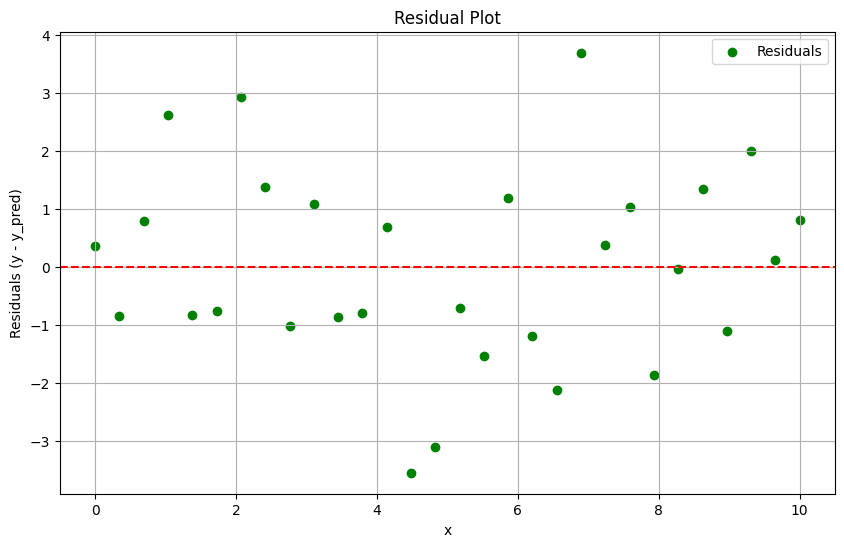

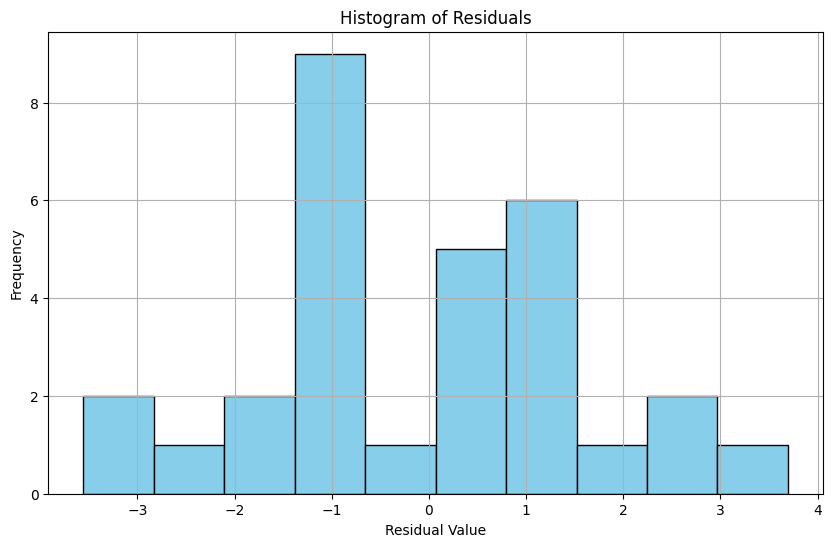

In [6]:
# Plot the residuals
plt.figure(figsize=(10, 6))

# Create a scatter plot of residuals
plt.scatter(x, residuals, color='green', label='Residuals')

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

# Add labels and title
plt.title('Residual Plot')
plt.xlabel('x')
plt.ylabel('Residuals (y - y_pred)')
plt.grid(True)
plt.legend()
plt.show()

# Display a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Making Predictions for New Data

Let's use our model to make predictions for new x values.

Predictions for new x values:
x = 12, Predicted y = 39.1970
x = 15, Predicted y = 47.5856
x = 20, Predicted y = 61.5666


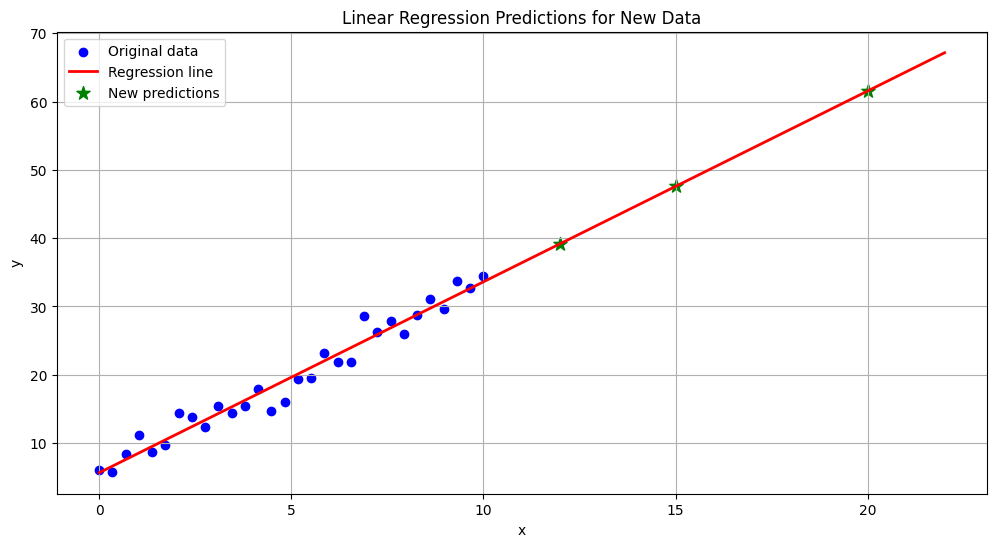

In [7]:
# Define new x values for prediction
new_x = np.array([12, 15, 20])

# Make predictions for the new x values
new_y_pred = predict(new_x)

# Display the predictions
print("Predictions for new x values:")
for i in range(len(new_x)):
    print(f"x = {new_x[i]}, Predicted y = {new_y_pred[i]:.4f}")

# Visualize the predictions
plt.figure(figsize=(12, 6))

# Plot original data and regression line
plt.scatter(x, y, color='blue', label='Original data')
x_line = np.linspace(0, 22, 100)  # Extended x range for visualization
plt.plot(x_line, predict(x_line), color='red', linewidth=2, label='Regression line')

# Highlight the new predictions
plt.scatter(new_x, new_y_pred, color='green', s=100, marker='*', label='New predictions')

# Add labels and title
plt.title('Linear Regression Predictions for New Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## Confidence Intervals for the Regression Line

Let's calculate and visualize confidence intervals for our regression line.

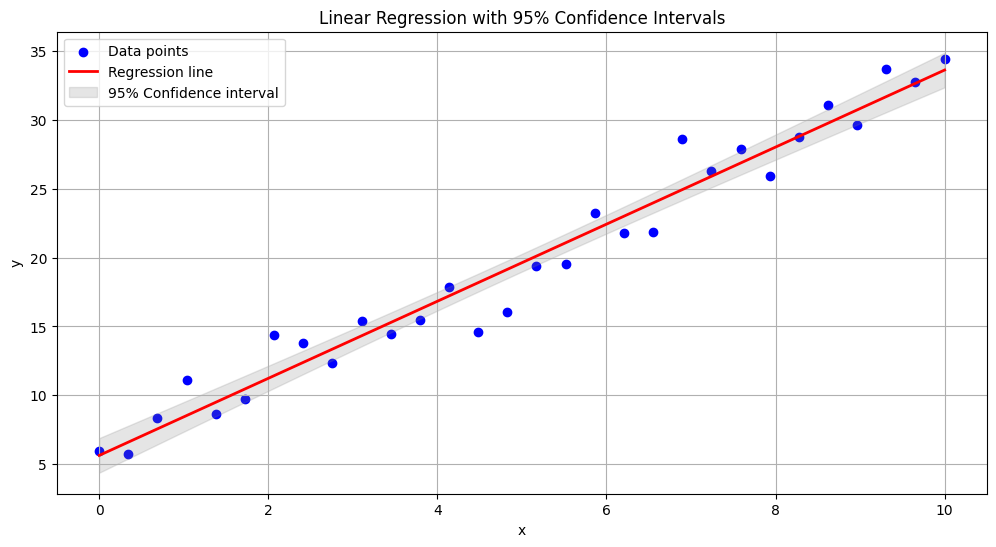

In [8]:
# Create a range of x values for plotting
x_line = np.linspace(0, 10, 100)

# Calculate predicted y values
y_line = predict(x_line)

# Calculate confidence intervals for the regression line
# This is a simplified approach - for exact confidence intervals, more complex calculations are needed
n = len(x)  # Sample size
mean_x = np.mean(x)
sum_squared_error = np.sum((y - y_pred) ** 2)
sum_squared_x_deviation = np.sum((x - mean_x) ** 2)

# Standard error of the regression
se = np.sqrt(sum_squared_error / (n - 2))

# Calculate standard error of the regression line at each point
se_line = se * np.sqrt(1/n + (x_line - mean_x)**2 / sum_squared_x_deviation)

# Calculate 95% confidence intervals (using t-distribution with n-2 degrees of freedom)
t_value = stats.t.ppf(0.975, n - 2)  # 95% confidence level
ci_upper = y_line + t_value * se_line
ci_lower = y_line - t_value * se_line

# Plot the data, regression line, and confidence intervals
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Regression line')
plt.fill_between(x_line, ci_lower, ci_upper, color='gray', alpha=0.2, label='95% Confidence interval')

plt.title('Linear Regression with 95% Confidence Intervals')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

## Comparison with NumPy's Polyfit

Let's compare our SciPy results with NumPy's polyfit function.

Comparison of regression coefficients:
SciPy - Slope: 2.796190, Intercept: 5.642757
NumPy - Slope: 2.796190, Intercept: 5.642757


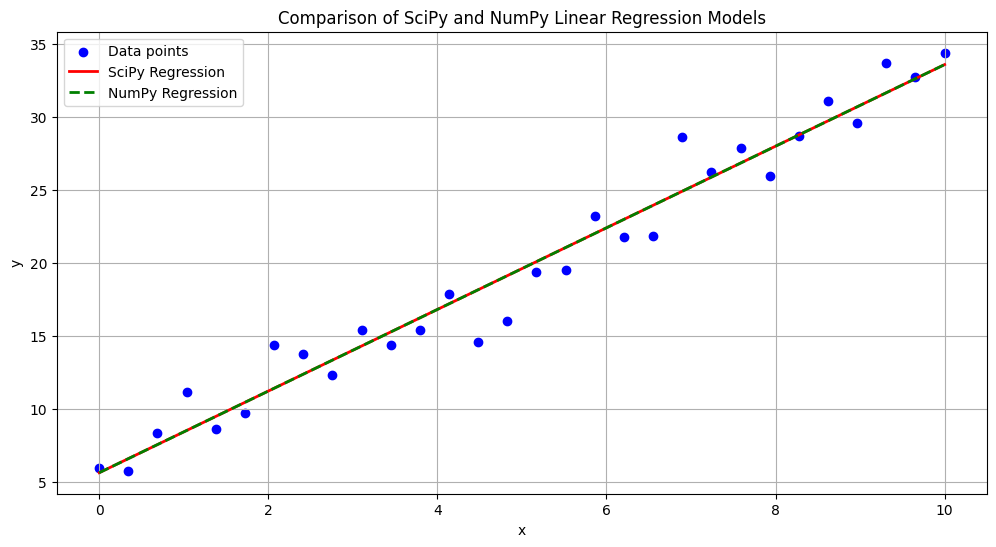

In [9]:
# Calculate linear regression using numpy's polyfit
np_coeffs = np.polyfit(x, y, 1)  # 1 for linear regression
np_slope = np_coeffs[0]
np_intercept = np_coeffs[1]

# Print results for comparison
print("Comparison of regression coefficients:")
print(f"SciPy - Slope: {slope:.6f}, Intercept: {intercept:.6f}")
print(f"NumPy - Slope: {np_slope:.6f}, Intercept: {np_intercept:.6f}")

# Create prediction function for numpy model
def np_predict(x_values):
    return np_slope * x_values + np_intercept

# Plot both models for comparison
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, predict(x_line), color='red', linewidth=2, label='SciPy Regression')
plt.plot(x_line, np_predict(x_line), color='green', linewidth=2, linestyle='--', label='NumPy Regression')

plt.title('Comparison of SciPy and NumPy Linear Regression Models')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()